# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

import mlflow
import mlflow.sklearn

In [3]:
mushroom = pd.read_csv('../data/raw/02_mushroom_data.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# Data Exploration

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom.isna().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

In [7]:
mushroom.duplicated().any()

False

edible       4208
poisonous    3916
Name: class, dtype: int64


<AxesSubplot: ylabel='class'>

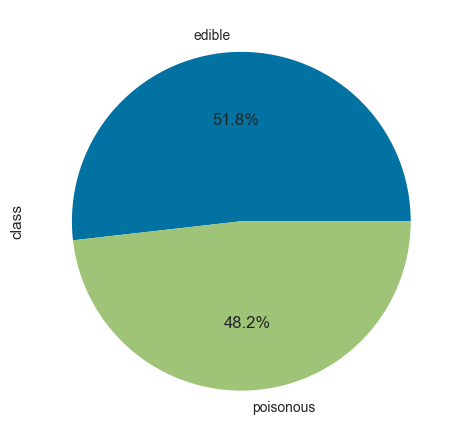

In [8]:
print(mushroom["class"].value_counts())
mushroom["class"].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [9]:
mushroom = mushroom.replace(np.nan, 'none')

In [10]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

woods      3148
grasses    2148
path       1144
leaves      832
urban       368
meadows     292
none        192
Name: habitat, dtype: int64


<AxesSubplot: >

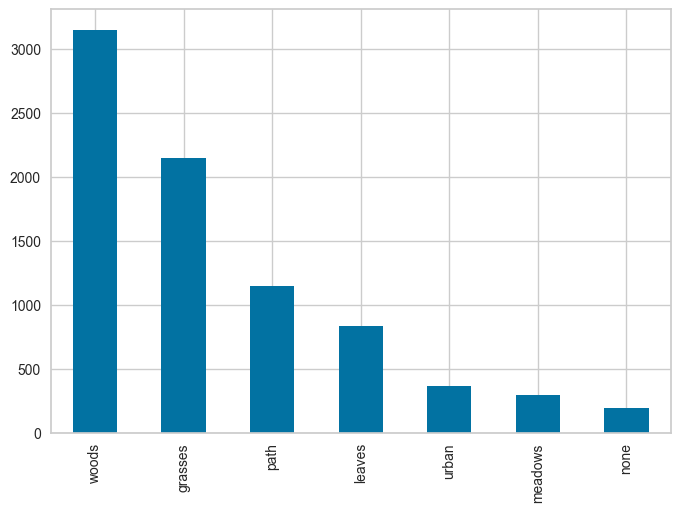

In [11]:
print(mushroom["habitat"].value_counts())
mushroom["habitat"].value_counts().plot(kind='bar')

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64


<AxesSubplot: >

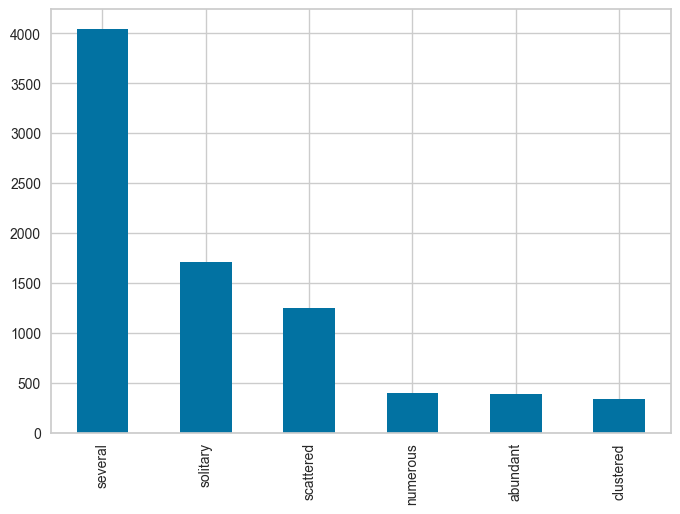

In [12]:
print(mushroom["population"].value_counts())
mushroom["population"].value_counts().plot(kind='bar')

In [14]:
mushroom.nunique(axis=0)

#ignore veil-type since only 1 unique value

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [15]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [16]:
mushroom['class'].unique()

array(['poisonous', 'edible'], dtype=object)

## PyCaret

In [17]:
mr_setup = setup(mushroom, target = 'class', train_size=0.8, session_id=123, transformation=True,
                 normalize=True, log_experiment=True, experiment_name='mushroom', remove_outliers=True, fold=10, 
                ignore_features=['veil-type'])

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(7799, 111)"
6,Transformed train set shape,"(6174, 111)"
7,Transformed test set shape,"(1625, 111)"
8,Ignore features,1
9,Ordinal features,5


In [18]:
#Print ordinal, numeric and categorical features
print(f'Ordinal features: {mr_setup._fxs["Ordinal"]}')
print(f'Categorical features: {mr_setup._fxs["Categorical"]}')

Ordinal features: {'bruises': ['bruises', 'no'], 'gill-attachment': ['attached', 'free'], 'gill-spacing': ['close', 'crowded'], 'gill-size': ['broad', 'narrow'], 'stalk-shape': ['enlarging', 'tapering']}
Categorical features: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [19]:
mr_transformed = mr_setup.get_config('dataset_transformed')
mr_transformed

,cap-shape_flat,cap-shape_convex,cap-shape_bell,cap-shape_knobbed,cap-shape_sunken,cap-shape_conical,cap-surface_smooth,cap-surface_scaly,cap-surface_fibrous,cap-surface_grooves,...,population_clustered,population_abundant,habitat_path,habitat_leaves,habitat_grasses,habitat_urban,habitat_woods,habitat_meadows,habitat_none,class
6708,1.234971,-0.920542,-0.231481,-0.31428,-0.065031,-0.018001,1.558846,-0.829342,-0.655361,-0.022049,...,-0.099063,-0.227965,2.377607,-0.293935,-0.622427,-0.218366,-0.817434,-0.194029,-0.093052,1
5815,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,1.205776,-0.655361,-0.022049,...,-0.099063,-0.227965,-0.420591,3.402108,-0.622427,-0.218366,-0.817434,-0.194029,-0.093052,1
7946,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,1.205776,-0.655361,-0.022049,...,-0.099063,-0.227965,2.377607,-0.293935,-0.622427,-0.218366,-0.817434,-0.194029,-0.093052,0
1971,1.234971,-0.920542,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,-0.829342,1.525877,-0.022049,...,-0.099063,-0.227965,-0.420591,-0.293935,1.606613,-0.218366,-0.817434,-0.194029,-0.093052,0
6191,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,1.558846,-0.829342,-0.655361,-0.022049,...,-0.099063,-0.227965,-0.420591,3.402108,-0.622427,-0.218366,-0.817434,-0.194029,-0.093052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6748,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,1.558846,-0.829342,-0.655361,-0.022049,...,-0.099063,-0.227965,-0.420591,3.402108,-0.622427,-0.218366,-0.817434,-0.194029,-0.093052,1
5533,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,1.205776,-0.655361,-0.022049,...,-0.099063,-0.227965,-0.420591,-0.293935,-0.622427,-0.218366,1.223341,-0.194029,-0.093052,1
3141,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,-0.829342,1.525877,-0.022049,...,-0.099063,-0.227965,-0.420591,-0.293935,-0.622427,-0.218366,1.223341,-0.194029,-0.093052,1
6480,-0.809736,1.086317,-0.231481,-0.31428,-0.065031,-0.018001,-0.641500,1.205776,-0.655361,-0.022049,...,-0.099063,-0.227965,-0.420591,-0.293935,-0.622427,-0.218366,1.223341,-0.194029,-0.093052,1


In [20]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9982,1.0000,0.9982,0.9982,0.9982,0.9963,0.9963,1.6350
catboost,CatBoost Classifier,0.9977,1.0000,0.9977,0.9977,0.9977,0.9954,0.9954,2.9080
gbc,Gradient Boosting Classifier,0.9965,0.9970,0.9965,0.9965,0.9965,0.9929,0.9930,1.1870
xgboost,Extreme Gradient Boosting,0.9954,1.0000,0.9954,0.9954,0.9954,0.9908,0.9908,0.9850
rf,Random Forest Classifier,0.9952,1.0000,0.9952,0.9953,0.9952,0.9904,0.9905,0.9510
knn,K Neighbors Classifier,0.9948,0.9964,0.9948,0.9948,0.9948,0.9895,0.9896,0.8240
et,Extra Trees Classifier,0.9945,1.0000,0.9945,0.9945,0.9945,0.9889,0.9890,1.0170
lightgbm,Light Gradient Boosting Machine,0.9943,0.9960,0.9943,0.9944,0.9943,0.9886,0.9887,0.9720
ada,Ada Boost Classifier,0.9940,1.0000,0.9940,0.9942,0.9940,0.9880,0.9881,0.9910
svm,SVM - Linear Kernel,0.9937,0.0000,0.9937,0.9938,0.9937,0.9874,0.9875,0.7800


In [21]:
best.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
tuned_rf = tune_model(best, return_tuner=True) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9985,1.0000,0.9985,0.9985,0.9985,0.9969,0.9969
5,0.9985,1.0000,0.9985,0.9985,0.9985,0.9969,0.9969
6,0.9908,1.0000,0.9908,0.9909,0.9908,0.9815,0.9817
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [23]:
tuned_rf

(LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=nan,
                    estimator=Pipeline(memory=Memory(location=None),
                                       steps=[('label_encoding',
                                               TransformerWrapperWithInverse(exclude=None,
                                                                             include=None,
                                                                             transformer=LabelEncoder())),
                                              ('numerical_imputer',
                                               Transf

In [24]:
best_rf = tuned_rf[0]

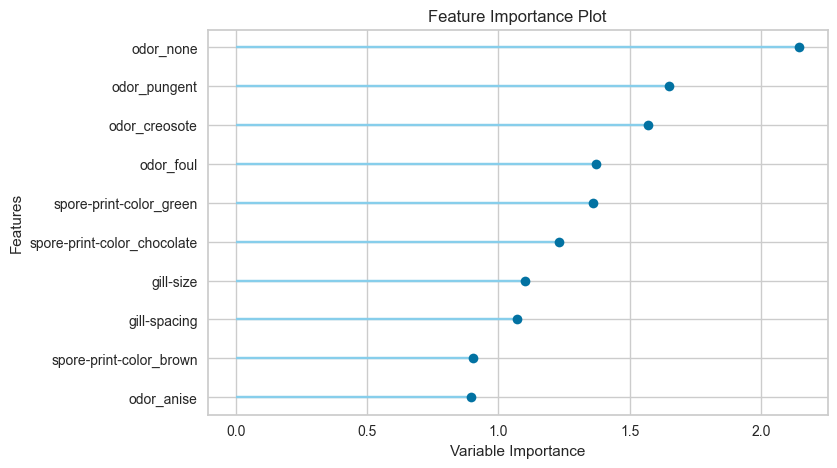

In [25]:
plot_model(best_rf, plot = 'feature')

# Prediction

In [26]:
mr_pred = predict_model(best_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [27]:
mr_pred.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
1186,flat,smooth,gray,no,none,free,crowded,broad,chocolate,tapering,...,white,white,one,evanescent,black,abundant,grasses,edible,edible,0.9999
5501,convex,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,pink,white,one,evanescent,white,several,path,poisonous,poisonous,0.9999
86,bell,smooth,white,bruises,almond,free,close,broad,white,enlarging,...,white,white,one,pendant,black,scattered,grasses,edible,edible,0.9996
4161,flat,fibrous,gray,bruises,none,free,close,broad,purple,tapering,...,white,white,one,pendant,brown,several,woods,edible,edible,0.9999
3838,flat,scaly,red,bruises,none,free,close,broad,pink,tapering,...,white,white,one,pendant,brown,solitary,woods,edible,edible,0.9999


In [28]:
final_rf = finalize_model(best_rf)

In [29]:
save_model(final_rf, 'mushroom_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                  TransformerWrapper(exclude=None, include=None,
                                     tra

In [30]:
#Final Random Forest model parameters for deployment
load_pipeline = load_model('mushroom_pipeline')
load_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\USER\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              m...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LogisticRegression(C=3.882, class_weight={}, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# MLFLOW UI

In [31]:
!mlflow ui

^C


In [32]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [33]:
# set the experiment id
mlflow.set_experiment(experiment_id="297215632804345769")
mlflow.autolog()

2024/02/23 12:02:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/02/23 12:02:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/02/23 12:02:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/02/23 12:02:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [35]:
# Calculate evaluation metrics
y_true = mr_pred['class']
y_pred = mr_pred['prediction_label']

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

accuracy = accuracy_score(y_true_encoded, y_pred_encoded)
auc = roc_auc_score(y_true_encoded, y_pred_encoded)
precision = precision_score(y_true_encoded, y_pred_encoded)
recall = recall_score(y_true_encoded, y_pred_encoded)
f1 = f1_score(y_true_encoded, y_pred_encoded)
mlflow.end_run()

# Register the pipeline with MLflow
with mlflow.start_run() as run:
    mlflow.log_param('train_size', 0.8)
    mlflow.log_param('transformation', True)
    mlflow.log_param('normalize', True)
    mlflow.log_param('remove_outliers', True)
    mlflow.log_param('fold', 5)

    # Log metrics
    mlflow.log_metric('Accuracy', accuracy)
    mlflow.log_metric('AUC', auc)
    mlflow.log_metric('Precision', precision)
    mlflow.log_metric('Recall', recall)
    mlflow.log_metric('F1-Score', f1)

    # Log the experiment name and run ID
    mlflow.set_experiment('mushroom')
    mlflow.log_param('experiment_name', 'mushroom')
    mlflow.log_param('run_id', run.info.run_id)
    
    # Log the pipeline object using mlflow.sklearn
    mlflow.sklearn.log_model(sk_model=best_rf, registered_model_name='mushroom_model', artifact_path='sk_model')


Registered model 'mushroom_model' already exists. Creating a new version of this model...
2024/02/23 12:03:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mushroom_model, version 2
Created version '2' of model 'mushroom_model'.
